# House Sales Analysis (King County, USA)
This project performs end‑to‑end data analysis on King County house sales data.

### **Project Objectives**
- Import and explore the dataset
- Perform data cleaning and wrangling
- Conduct exploratory data analysis (EDA)
- Build and evaluate predictive models (Linear & Polynomial Regression)
- Interpret results and visualize key insights


# House Sales in King County, USA


This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Module 1: Importing Data Sets


Load the csv:


In [63]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

We use the method <code>head</code> to display the first 5 columns of the dataframe.  
we will also get an indea of the values in the dataframe


In [64]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Now we will look at data types for each attribute/column

In [65]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

We use the method describe to obtain a statistical summary of the dataframe.


In [66]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Module 2: Data Wrangling


First we remove the unwanted columns.

In [67]:
df.drop(['id','Unnamed: 0'], axis=1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We can see we have missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>


In [68]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


We can replace the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code> using the method <code>replace()</code>.

In [69]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

We also replace the missing values of the column <code>'bathrooms'</code> with the mean of the column  <code>'bathrooms' </code> using the method <code>replace()</code>. 


In [70]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [71]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Module 3: Exploratory Data Analysis


We will check the  unique values for floors(Number of floors in the house)

In [72]:
unique_floor_values=df['floors'].value_counts().to_frame()
unique_floor_values.head()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161


Let us check using boxplot, the statistics of houses with or without a waterfront  
0 - No waterfront  
1 - Waterfront 

(0.0, 8081250.0)

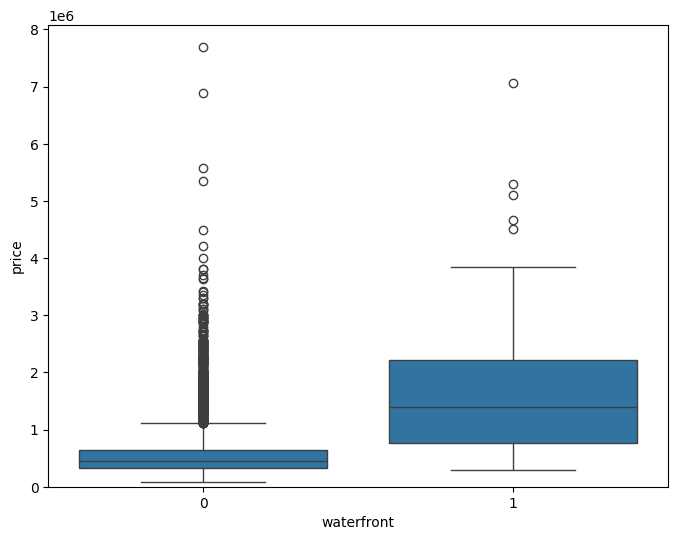

In [73]:
width = 8
height = 6
plt.figure(figsize=(width, height))
sns.boxplot(x="waterfront", y="price", data=df)
plt.ylim(0,)

We observe that the prices for houses with waterfront are significantly higher

Let us observe if there is a relation between the house area(in square feet) and the prices of the house using a regression plot

(0.0, 8081250.0)

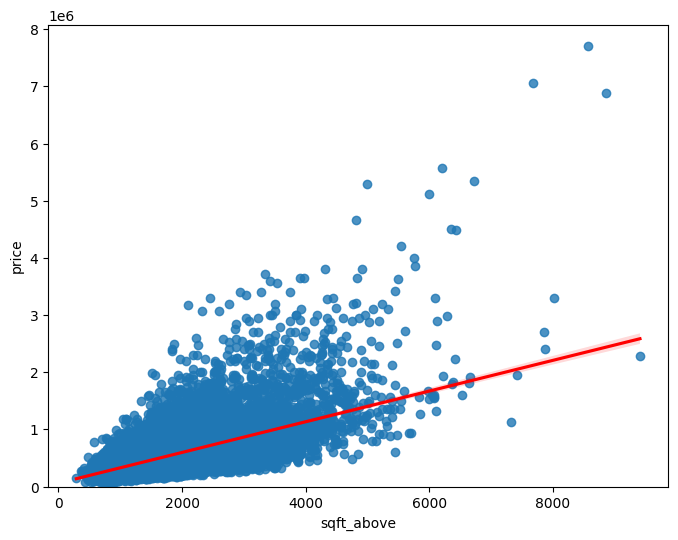

In [74]:
width = 8
height = 6
plt.figure(figsize=(width, height))
sns.regplot(x="sqft_above", y="price", data=df, line_kws={"color":"r"})
plt.ylim(0,)

A clear relation between the two variables is observed

We can use the Pandas method <code>corr()</code>  to find the feature other than price that is most correlated with price.


In [75]:
df.select_dtypes(include=['int64', 'float64']).corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

We observe the correlation values for each variable.  
Therefore we choose the following variables todevelop our model upon -  
  
floors  
waterfront  
lat  
bedrooms  
sqft_basement  
view  
bathrooms  
sqft_living15  
sqft_above  
grade  
sqft_living   

.... against Price

In [76]:
## We will create a Dataframe to keep track of every model and its R^2 values
result_df=pd.DataFrame(columns=['Variables','Model','R^2 value'])

# Module 4: Model Development


We can Fit a linear regression model using the  longitude feature <code>'long'</code> and  caculate the R^2.


In [ ]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)

lm1_1var=lm.score(X, Y)
data={'Variables':['long'], 'Model':['Linear Regression'] ,'R^2 value':[lm1_1var]}
new_row=pd.DataFrame(data)
result_df=pd.concat([result_df, new_row], ignore_index=True)

lm.score(X, Y)




C:\Users\Asus\AppData\Local\Temp\ipykernel_17640\1130578978.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df=pd.concat([result_df, new_row], ignore_index=True)


,Variables,Model,R^2 value
0,long,Linear Regression,0.000468


The R^2 score indicates that there is poor relationship between 'long' and 'Price'  
i.e - The longitude of the house does not have a significant effect on  the Price 

In [78]:
X1 = df[['sqft_living']]
Y1 = df['price']
lm = LinearRegression()
lm.fit(X1,Y1)

lm2_1var=lm.score(X1, Y1)
data={'Variables':['sqft_living'], 'Model':['Linear regression'] ,'R^2 value':[lm2_1var]}
new_row=pd.DataFrame(data)
result_df=pd.concat([result_df, new_row], ignore_index=True)

lm.score(X1, Y1)



0.4928532179037931

Here we see that the R^2 value suggests that we have a strong relationship between the two variables -  
sqft_living(area in sq feet of the house) and the price(price of the house)

Now we will fit multiple features and generate a model

In [81]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X2=df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
Y2=df['price']

lm=LinearRegression()
lm.fit(X2, Y2)

mlm1_mvar=lm.score(X2, Y2)
data={'Variables':["floors, waterfront, lat, bedrooms, sqft_basement, view, bathrooms, sqft_living15, sqft_above, grade, sqft_living"], 'Model':['Polynomial Regression'] ,'R^2 value':[mlm1_mvar]}
new_row=pd.DataFrame(data)
result_df=pd.concat([result_df, new_row], ignore_index=True)

lm.score(X2, Y2)

# To predict the price, run the following code with actual values -
# predicted_price=lm.predict(values)



0.6576951666037499

We can see from the R^2 score that the model is a good fit.


Now we will create a Pipeline that uses the following -  
1. Standardscaler - to scale the values  
2. PolynomialFeatures - to convert the model into a polynomial of higher degree  
3. linearRegression - the model we want to use

In [82]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X3=df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
Y3=df['price']


Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

pipe=Pipeline(Input)
pipe.fit(X3,Y3)

pipe_mvar=pipe.score(X3,Y3)
data={'Variables':["floors, waterfront, lat, bedrooms, sqft_basement, view, bathrooms, sqft_living15, sqft_above, grade, sqft_living"], 'Model':['Pipeline : Higher degree Polynomial Regression using StandardSCaler and PolynomialFeatures'] ,'R^2 value':[pipe_mvar]}
new_row=pd.DataFrame(data)
result_df=pd.concat([result_df, new_row], ignore_index=True)

pipe.score(X3,Y3)

0.7513408515988733

# Module 5: Model Evaluation and Refinement


Import the necessary modules:


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


We will split the data into training and testing sets:


In [83]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


Now we will use the Ridge regression model to evaluate the data

In [84]:
from sklearn.linear_model import Ridge
rid=Ridge(alpha=0.1)
rid.fit(x_train, y_train)

rm_mvar=rid.score(x_test, y_test)
data={'Variables':["floors, waterfront, lat, bedrooms, sqft_basement, view, bathrooms, sqft_living15, sqft_above, grade, sqft_living"], 'Model':['Ridge Regression'] ,'R^2 value':[rm_mvar]}
new_row=pd.DataFrame(data)
result_df=pd.concat([result_df, new_row], ignore_index=True)

rid.score(x_test, y_test)

0.6478759163939111

Lastly we will use PolynomialFeatures along with Ridge to develop a model of higher degree variables

In [85]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train)
x_test_pr=pr.transform(x_test)

rid=Ridge(alpha=0.1)
rid.fit(x_train_pr, y_train)

rmpm_mvar=rid.score(x_test_pr, y_test)
data={'Variables':["floors, waterfront, lat, bedrooms, sqft_basement, view, bathrooms, sqft_living15, sqft_above, grade, sqft_living"], 'Model':['Higher degree Polynomial regression using Ridge'] ,'R^2 value':[rmpm_mvar]}
new_row=pd.DataFrame(data)
result_df=pd.concat([result_df, new_row], ignore_index=True)

rid.score(x_test_pr, y_test)

0.7002744254571471

Now let us print the concluding DataFrame

In [89]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)



result_df

,Variables,Model,R^2 value
0,long,Linear Regression,0.000468
1,sqft_living,Linear regression,0.492853
2,"floors, waterfront, lat, bedrooms, sqft_basement, view, bathrooms, sqft_living15, sqft_above, grade, sqft_living",Polynomial Regression,0.657695
3,"floors, waterfront, lat, bedrooms, sqft_basement, view, bathrooms, sqft_living15, sqft_above, grade, sqft_living",Polynomial Regression,0.657695
4,"floors, waterfront, lat, bedrooms, sqft_basement, view, bathrooms, sqft_living15, sqft_above, grade, sqft_living",Pipeline : Higher degree Polynomial Regression using StandardSCaler and PolynomialFeatures,0.751341
5,"floors, waterfront, lat, bedrooms, sqft_basement, view, bathrooms, sqft_living15, sqft_above, grade, sqft_living",Ridge Regression,0.647876
6,"floors, waterfront, lat, bedrooms, sqft_basement, view, bathrooms, sqft_living15, sqft_above, grade, sqft_living",Higher degree Polynomial regression using Ridge,0.700274


# Conclusion  

This project explored the King County House Sales dataset through a complete data analysis workflow — from importing and cleaning the data to performing exploratory analysis and building predictive models.

### Key findings and outcomes:

**Data Understanding & Preparation:**
We identified important numerical and categorical features, handled missing values, and prepared the dataset for modeling.

**Exploratory Data Analysis (EDA):**
Visualizations and summary statistics revealed strong correlations between price and attributes like living area, grade, and number of bathrooms. We also detected outliers and trends in location-based pricing.

**Model Development:**
Multiple regression models were built, including:

Simple Linear Regression

Multiple Linear Regression

Polynomial Regression (Degree 2)

**Model Evaluation & R² Improvements:**
By experimenting with different feature combinations and refining the models, we observed improved R² scores, indicating better predictive performance.

Linear models offered a strong baseline.

Polynomial regression further increased R², capturing non-linear relationships in the housing data.
These incremental improvements demonstrate how model complexity and feature selection influence real-world predictive accuracy.

Final Insights:
Larger living spaces, higher-quality grades, and desirable geographic locations were the strongest drivers of house prices. The modeling workflow shows how data analysis and machine learning can be combined to extract meaningful insights from real estate data.